In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
print(tf.__version__)

2.2.0


In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(training_images.shape)

(60000, 28, 28)


1


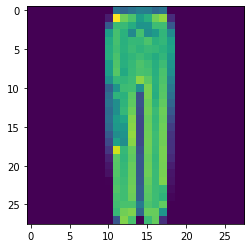

In [ ]:
np.set_printoptions(linewidth=50)
import matplotlib.pyplot as plt
plt.imshow(training_images[1000])
print(training_labels[1000])
# print(training_images[1000])

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0 

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [ ]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8956
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.9004
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9030
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9087
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2400 - accuracy: 0.9116
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2329 - accuracy: 0.9129
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2257 - accuracy: 0.9147
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2186 - accuracy: 0.9185
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2120 - accuracy: 0.9202
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.205

In [ ]:
model.summary()

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.8905


[0.5142486691474915, 0.890500009059906]

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

[3.15683158e-17 1.08331486e-12 2.36183035e-12
 3.71627147e-22 2.85722711e-19 1.37644856e-08
 2.13791983e-12 6.71535417e-07 1.82089891e-15
 9.99999285e-01]


In [ ]:
print(test_labels[0])

9


In [ ]:
model3 = tf.keras.Sequential()
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(units=128, activation=tf.nn.relu))
model3.add(keras.layers.Dense(units=512, activation=tf.nn.relu))
model3.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get("accuracy")>0.9):
      print("Exiting: Reached 90% Accuracy")
      self.model.stop_training = True

In [ ]:
model3.fit(training_images, training_labels, epochs=10, callbacks=[mycallback()])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1526 - accuracy: 0.9406


In [ ]:
model3.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8939


[0.4325491786003113, 0.8938999772071838]